In [2]:
import tensorflow as tf

In [3]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
tf.test.gpu_device_name()

2022-02-07 15:44:32.989346: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-07 15:44:33.015569: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-07 15:44:33.025145: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-07 15:44:33.025758: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

'/device:GPU:0'

In [6]:
!nvidia-smi

Mon Feb  7 15:46:19 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.142.00   Driver Version: 450.142.00   CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            On   | 00000000:00:1E.0 Off |                    0 |
| N/A   33C    P0    25W /  70W |   1047MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
gpu = tf.config.experimental.list_physical_devices('GPU')[0]
tf.config.experimental.set_virtual_device_configuration(
    gpu,
    [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4532)])

2022-02-07 16:21:57.620521: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-07 16:21:57.630365: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-07 16:21:57.630970: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


## 텐서플로우의 변수 종류
1. Constant
  - 변하지 않는 자료
  - 입력변수들과 출력변수
2. Variable
  - 변하는 자료
  - 추정하고 싶은 자료

- Constant 타입으로 지정된 자료를 이용해서 Variable을 추정하는 형태로 텐서플로우가 동작
- 텐서플로우 사용시 특히 주의
  - 자료의 타입과 크기에 민감합니다.
  - float32, float64, int32, int64

In [5]:
x = np.array([20, 21, 22, 23, 24])
y = np.array([15, 16, 21, 33, 42])

x = tf.constant(x, dtype=tf.float64)
y = tf.constant(y, dtype=tf.float64)

In [6]:
a = tf.Variable([0], dtype=tf.float64)
b = tf.Variable([0], dtype=tf.float64)

## 손실함수
- 에러함수라고 사용했던 그 함수와 동일한 함수
- 딥러닝은 손실함수(Loss Function)라고 표현
- MSE(Mean Squared Error/Estimation)
  - 잔차들의 평균값을 손실함수의 값으로 사용

$$
  L(a, b) = \frac{1}{n}\sum_{i=0}^n (y_i - (ax_i + b))^2
$$

In [16]:
def mse():
    yhat = a*x + b
    return tf.reduce_mean(tf.square(y-yhat))

In [17]:
optimizer = tf.optimizers.Adam(0.01)

In [9]:
for i in range(100000):
    optimizer.minimize(mse, var_list=[a, b])
    if i % 10000 == 0:
        print(f'{i} -> a: {a.numpy()}, b: {b.numpy()}, loss: {mse().numpy()}')

Extension horovod.torch has not been built: /home/ubuntu/anaconda3/envs/tensorflow2_latest_p37/lib/python3.7/site-packages/horovod/torch/mpi_lib/_mpi_lib.cpython-37m-x86_64-linux-gnu.so not found
If this is not expected, reinstall Horovod with HOROVOD_WITH_PYTORCH=1 to debug the build error.
Warning! MPI libs are missing, but python applications are still avaiable.
[2022-02-07 10:39:04.106 ip-172-31-44-43:2708 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2022-02-07 10:39:04.125 ip-172-31-44-43:2708 INFO profiler_config_parser.py:111] Unable to find config at /opt/ml/input/config/profilerconfig.json. Profiler is disabled.
0 -> a: [0.01], b: [0.01], loss: 743.085100327811
10000 -> a: [3.81688321], b: [-58.27445909], loss: 30.665903802939198
20000 -> a: [7.01850207], b: [-128.99968247], loss: 9.033338040021755
30000 -> a: [7.1], b: [-130.8], loss: 9.02000000000002
40000 -> a: [7.10000085], b: [-130.79999915], loss: 9.020000000383838
50000 -> a: [7.09999999], b: [-130.80000001], 

In [5]:
temp = np.array([32.13, 25.95, 27.95, 26.3, 26.33, 32.78, 31.48, 
    32.63, 28.2, 31.82, 25.52, 27.42, 28.92, 30.17, 
    29.09, 31.38, 29.52, 27.83, 30.27, 26.91])
elec = np.array([364.5, 105.82, 147.28, 89.57, 114.05, 411.23, 
    301.93, 386.16, 149.09, 327.93, 111.67, 130.59, 180.6, 
    214.77, 188.84, 312.11, 194.13, 135.12, 236.75, 113.6])

In [6]:
df = pd.DataFrame( np.array( [elec, temp] ).T, columns=['elec', 'temp'] )
df.sort_values(by='temp', inplace=True, ignore_index=True)

In [7]:
x = tf.constant(df['temp'].to_numpy(), dtype=tf.float64)
y = tf.constant(df['elec'].to_numpy(), dtype=tf.float64)

a = tf.Variable([0], dtype=tf.float64)
b = tf.Variable([0], dtype=tf.float64)

2022-02-07 16:22:06.502363: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-07 16:22:06.502949: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-07 16:22:06.503953: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-07 16:22:06.504832: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [27]:
for i in range(100000):
    optimizer.minimize(mse, var_list=[a, b])
    if i % 10000 == 9999:
        print(f'{i} -> a: {a.numpy()}, b: {b.numpy()}, loss: {mse().numpy()}')

9999 -> a: [9.5442496], b: [-61.28006221], loss: 6411.974857243504
19999 -> a: [12.92071596], b: [-160.23701234], loss: 5291.157405256898
29999 -> a: [16.29160677], b: [-259.04301934], loss: 4293.071770856648
39999 -> a: [19.65698103], b: [-357.68731273], loss: 3417.2526154222624
49999 -> a: [23.01512282], b: [-456.11965008], loss: 2663.461251504985
59999 -> a: [26.36337848], b: [-554.2621733], loss: 2031.3764569276864
69999 -> a: [29.69730379], b: [-651.98464645], loss: 1520.5431223861037
79999 -> a: [33.00865706], b: [-749.04450981], loss: 1130.2650082192345
89999 -> a: [36.27907533], b: [-844.90649537], loss: 859.3453537938665
99999 -> a: [39.4537164], b: [-937.96012022], loss: 705.239809445191


In [28]:
for i in range(100000):
    optimizer.minimize(mse, var_list=[a, b])
    if i % 10000 == 0:
        print(f'{i} -> a: {a.numpy()}, b: {b.numpy()}, loss: {mse().numpy()}')

0 -> a: [39.45402422], b: [-937.96914265], loss: 705.230067835579
10000 -> a: [42.15578535], b: [-1017.16181952], loss: 658.571742348282
20000 -> a: [42.42761654], b: [-1025.12943977], loss: 658.1785604546216
30000 -> a: [42.42761554], b: [-1025.12944077], loss: 658.1785604537138
40000 -> a: [42.42761637], b: [-1025.12943995], loss: 658.1785604543293
50000 -> a: [42.42763097], b: [-1025.12942534], loss: 658.1785606710915
60000 -> a: [42.42761554], b: [-1025.12944077], loss: 658.178560453712
70000 -> a: [42.42758171], b: [-1025.1294746], loss: 658.1785614988554
80000 -> a: [42.42761554], b: [-1025.12944077], loss: 658.178560453713
90000 -> a: [42.42761554], b: [-1025.12944077], loss: 658.1785604537123


## 비선형 모형
- 뉴럴넷도 비슷하게 추정하려는 모수의 수를 늘려서 비선형 모형을 찾게 됩니다.
  - 모수의 수를 레이어와 노드를 이용해서 식을 늘리는 방식으로 모수의 수를 늘리게 됩니다.

### Neural Network Model

- 행렬의 내적
$$
    \begin{bmatrix}
        x_{11} & x_{12} & x_{13} & x_{14} \\
        x_{21} & x_{22} & x_{23} & x_{24} \\
        x_{31} & x_{32} & x_{33} & x_{34} \\
    \end{bmatrix}
    \begin{bmatrix}
        \beta_1 \\
        \beta_2 \\
        \beta_3 \\
        \beta_4
    \end{bmatrix} = 
    \begin{bmatrix}
        x_{11} \cdot \beta_1 + x_{12} \cdot \beta_2 + x_{13} \cdot \beta_3 + x_{14} \cdot \beta_4 \\
        x_{21} \cdot \beta_1 + x_{22} \cdot \beta_2 + x_{23} \cdot \beta_3 + x_{24} \cdot \beta_4 \\
        x_{31} \cdot \beta_1 + x_{32} \cdot \beta_2 + x_{33} \cdot \beta_3 + x_{34} \cdot \beta_4 \\
    \end{bmatrix}
$$
- 모델의 구성은 이렇습니다.
  1. Hidden Layer

  $$
    h = x \cdot W1 + b1
  $$

  2. output Layer
  $$
    \hat y = h \cdot W2 + b2
  $$


In [8]:
x = tf.constant(df[['temp']].to_numpy(), dtype=tf.float64)
y = tf.constant(df['elec'].to_numpy(), dtype=tf.float64)

tf.random.set_seed(123)

# hidden layer
w1 = tf.Variable( tf.random.normal([1, 10], dtype=tf.float64), dtype=tf.float64)
b1 = tf.Variable( tf.random.normal([10], dtype=tf.float64), dtype=tf.float64)

# output layer
w2 = tf.Variable( tf.random.normal([10, 1], dtype=tf.float64), dtype=tf.float64)
b2 = tf.Variable( tf.random.normal([1], dtype=tf.float64), dtype=tf.float64)

In [7]:
w1

<tf.Variable 'Variable:0' shape=(1, 10) dtype=float64, numpy=
array([[ 1.88377388, -2.41307987,  0.17593841, -0.71210258, -0.978109  ,
         1.40744455, -0.20590845,  0.60427003, -0.04915523, -0.36397701]])>

In [8]:
w2

<tf.Variable 'Variable:0' shape=(10, 1) dtype=float64, numpy=
array([[-0.20932416],
       [ 0.35978459],
       [-0.06081152],
       [-1.64009989],
       [-0.05287648],
       [ 0.0262231 ],
       [-0.75764927],
       [-1.5746661 ],
       [-1.61473649],
       [-0.46128283]])>

In [9]:
# hidden model
@tf.function
def hidden():
    return tf.matmul(x, w1) + b1

# output model
@tf.function
def model():
    return tf.matmul(hidden(), w2) + b2

In [10]:
@tf.function
def loss():
    return tf.reduce_mean( tf.square(y - model()) )

optimizer = tf.optimizers.Adam(0.01)

In [12]:
for i in range(100000):
    optimizer.minimize(loss, var_list=[w1, b1, w2, b2])
    if i % 10000 == 0:
        print(f'{i} -> w1: {w1.numpy()}, w2: {w2.numpy()}, loss: {loss().numpy()}')

0 -> w1: [[ 1.86379787 -2.39309541  0.15603932 -0.73209864 -0.99811966  1.427411
  -0.22590654  0.58427784 -0.06915132 -0.38397733]], w2: [[-0.18933164]
 [ 0.33979175]
 [-0.04084039]
 [-1.66009874]
 [-0.07287361]
 [ 0.04621955]
 [-0.77765708]
 [-1.55467748]
 [-1.63459054]
 [-0.48128459]], loss: 59658.31361022429
10000 -> w1: [[ 1.52034815 -2.10151173 -1.05654174 -1.02987222 -1.19226889  1.68111145
  -0.50839049  0.29141337 -0.3579915  -0.64610422]], w2: [[ 0.31750028]
 [ 0.09895742]
 [ 6.15307276]
 [-1.95899254]
 [-0.92383386]
 [ 0.56543528]
 [-1.54529094]
 [-1.47846746]
 [-2.56473445]
 [-1.36784789]], loss: 10177.642931006385
20000 -> w1: [[ 1.44600003 -1.84453779 -1.04497124 -1.0237714  -1.17098321  1.6418152
  -0.49838106  0.26823243 -0.35480377 -0.63393772]], w2: [[ 0.3132023 ]
 [ 0.08090305]
 [ 6.15900982]
 [-1.94330055]
 [-0.92172959]
 [ 0.56253927]
 [-1.51577906]
 [-1.36241531]
 [-2.51982469]
 [-1.3501019 ]], loss: 10177.642931
30000 -> w1: [[ 1.36763785 -1.47362587 -1.0334571  

## Keras

In [9]:
x = tf.constant(df[['temp']].to_numpy(), dtype=tf.float64)
y = tf.constant(df['elec'].to_numpy(), dtype=tf.float64)

In [10]:
model = tf.keras.models.Sequential()

# layer는 생성된 모델 객체에 add를 통해서 쉽게 추가
model.add( tf.keras.layers.Dense(1, input_shape=x.shape) )

# 최적화 옵션
optimizer = tf.keras.optimizers.Adam(0.01)
model.compile(
  loss='mean_squared_error', 
  optimizer = optimizer
)

In [13]:
history = model.fit(x, y, epochs=100000, verbose=0)

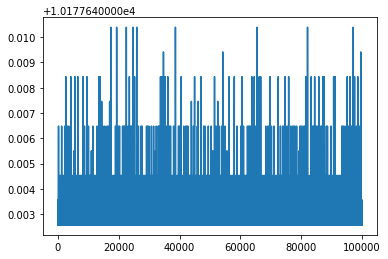

In [14]:
plt.plot(history.history['loss'])

In [17]:
model = tf.keras.models.Sequential()

# layer는 생성된 모델 객체에 add를 통해서 쉽게 추가
model.add( tf.keras.layers.Dense(1, input_shape=x.shape) )

# 최적화 옵션
optimizer = tf.keras.optimizers.Adam()
model.compile(
  loss='mse', 
  optimizer = optimizer
)

In [18]:
history = model.fit(x, y, epochs=200000, verbose=0)

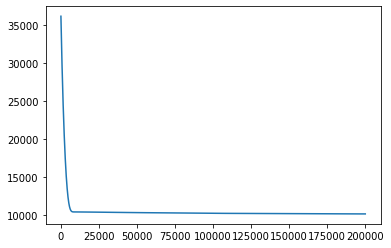

In [19]:
plt.plot(history.history['loss'])

In [20]:
model = tf.keras.models.Sequential()

# layer는 생성된 모델 객체에 add를 통해서 쉽게 추가
model.add( tf.keras.layers.Dense(1, input_shape=x.shape) )

# 최적화 옵션
optimizer = tf.keras.optimizers.RMSprop(0.01)
model.compile(
  loss='mse', 
  optimizer = optimizer
)

In [21]:
history = model.fit(x, y, epochs=10000, verbose=0)

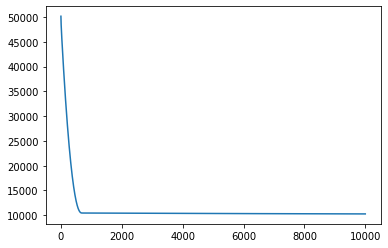

In [22]:
plt.plot(history.history['loss'])

### keras with Neural Network
- 이렇게 층층히 쌓아 올리는 것은 아무 의미가 없습니다.
  - 어짜피 선형 + 선형 = 선형
  - 그냥 선형회귀모형과 크게 다르지 않습니다.

- 활성화 함수(Activate Function)
  - 지금의 인공신경망은 없었을 수도 있습니다.
  - 선형 결합을 비선형 결합으로 만들어주는 역할
  - sigmoid, Relu, tanh
    - 확률밀도함수의 누적분포함수의 종류
    - 그중에서 sigmoid는 logit 함수와 동일한 함수 입니다.

In [25]:
model = tf.keras.models.Sequential()

# hidden layer
model.add( tf.keras.layers.Dense(10, input_shape=x.shape))

# output layer
model.add( tf.keras.layers.Dense(1) )

# 최적화 옵션
optimizer = tf.keras.optimizers.Adam(0.01)
model.compile(
  loss='mse', 
  optimizer = optimizer
)

In [26]:
model.fit(x, y, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 374ms/step - loss: 65200.2891
Epoch 2/1000
1/1 [==============================] - 0s 4ms/step - loss: 64245.6641
Epoch 3/1000
1/1 [==============================] - 0s 6ms/step - loss: 63305.5820
Epoch 4/1000
1/1 [==============================] - 0s 4ms/step - loss: 62380.1250
Epoch 5/1000
1/1 [==============================] - 0s 4ms/step - loss: 61469.2695
Epoch 6/1000
1/1 [==============================] - 0s 4ms/step - loss: 60572.8750
Epoch 7/1000
1/1 [==============================] - 0s 5ms/step - loss: 59690.6953
Epoch 8/1000
1/1 [==============================] - 0s 4ms/step - loss: 58822.3242
Epoch 9/1000
1/1 [==============================] - 0s 4ms/step - loss: 57967.2422
Epoch 10/1000
1/1 [==============================] - 0s 4ms/step - loss: 57124.7188
Epoch 11/1000
1/1 [==============================] - 0s 4ms/step - loss: 56293.8945
Epoch 12/1000
1/1 [==============================] - 0s 4ms/step - loss: 55473.7812

In [27]:
model.get_weights()

[array([[-1.1133287 ,  1.4427742 , -0.7612003 , -1.0454075 , -0.20017835,
          0.05310182,  0.89162725,  0.26219404, -0.18598083, -0.4813832 ]],
       dtype=float32),
 array([-1.5860994 ,  1.2700393 , -1.2920964 , -1.5642864 ,  0.55658865,
        -0.29302987,  1.1620733 ,  0.8524388 , -0.75393677, -1.3023031 ],
       dtype=float32),
 array([[-1.0045727 ],
        [ 1.1271118 ],
        [-1.3269646 ],
        [-1.0606263 ],
        [ 0.09952877],
        [ 0.03941459],
        [ 1.6621511 ],
        [ 0.37103802],
        [-0.42332122],
        [-0.6679416 ]], dtype=float32),
 array([0.90388566], dtype=float32)]

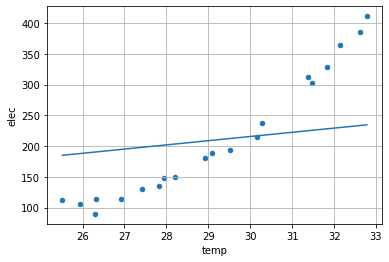

In [28]:
df.plot(kind='scatter', x='temp', y='elec')
plt.plot( df['temp'].to_numpy(), model.predict( df[['temp']]).flatten() )
plt.grid()
plt.show()

In [43]:
x = tf.constant(df[['temp']].to_numpy(), dtype=tf.float64)
y = tf.constant(df['elec'].to_numpy(), dtype=tf.float64)

model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Dense(10, activation='sigmoid', input_shape=x.shape))
model.add( tf.keras.layers.Dense(4, activation='sigmoid'))
model.add( tf.keras.layers.Dense(1) )

optimizer = tf.keras.optimizers.Adam(0.01)
model.compile(
  loss='mse', 
  optimizer = optimizer
)

In [44]:
history = model.fit(x, y, epochs=10000, verbose=False)

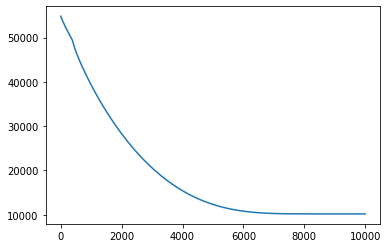

In [45]:
plt.plot(history.history['loss'])

In [46]:
x = tf.constant(df[['temp']].to_numpy(), dtype=tf.float64)
y = tf.constant(df['elec'].to_numpy(), dtype=tf.float64)

model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Dense(10, activation='relu', input_shape=x.shape))
model.add( tf.keras.layers.Dense(4, activation='relu'))
model.add( tf.keras.layers.Dense(1) )

optimizer = tf.keras.optimizers.Adam(0.01)
model.compile(
  loss='mse', 
  optimizer = optimizer
)

In [47]:
history = model.fit(x, y, epochs=10000, verbose=False)

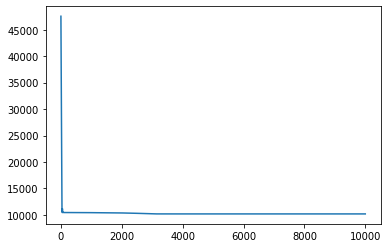

In [48]:
plt.plot(history.history['loss'])

In [49]:
x = tf.constant(df[['temp']].to_numpy(), dtype=tf.float64)
y = tf.constant(df['elec'].to_numpy(), dtype=tf.float64)

model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Dense(10, activation='tanh', input_shape=x.shape))
model.add( tf.keras.layers.Dense(4, activation='tanh'))
model.add( tf.keras.layers.Dense(1) )

optimizer = tf.keras.optimizers.Adam(0.01)
model.compile(
  loss='mse', 
  optimizer = optimizer
)

In [50]:
history = model.fit(x, y, epochs=10000, verbose=False)

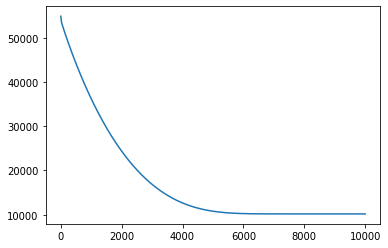

In [51]:
plt.plot(history.history['loss'])

In [52]:
x = tf.constant(df[['temp']].to_numpy(), dtype=tf.float64)
y = tf.constant(df['elec'].to_numpy(), dtype=tf.float64)

model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Dense(10, activation='tanh', input_shape=x.shape))
model.add( tf.keras.layers.Dense(4, activation='tanh'))
model.add( tf.keras.layers.Dense(1) )

optimizer = tf.keras.optimizers.Adam(0.001)
model.compile(
  loss='mse', 
  optimizer = optimizer
)

In [53]:
history = model.fit(x, y, epochs=100000, verbose=False)

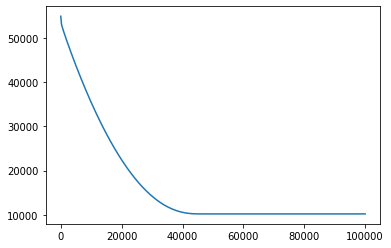

In [54]:
plt.plot(history.history['loss'])